In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df=pd.read_csv('/content/soil_data.csv')



In [36]:
df.head(100)

,Soil_pH,Organic_Carbon,Cation_Exchange_Capacity,Nitrogen,Phosphorous,Potassium,nutrition_values
0,11.138750,0.632820,130.161007,68.003751,147.549779,193.965823,normal
1,7.277492,0.867482,97.512348,78.550125,190.865741,709.062684,high
2,8.674866,0.710937,121.616193,36.821155,164.884191,172.472454,normal
3,11.647675,0.698268,19.238280,85.100424,128.387267,928.540979,normal
4,13.173375,0.561635,140.153713,93.181526,124.921220,202.669022,normal
...,...,...,...,...,...,...,...
95,8.035526,0.757992,115.717511,41.078518,118.726655,887.449794,normal
96,7.034061,0.402233,39.993362,84.738351,68.178093,446.344058,normal
97,8.847884,0.335739,116.634273,33.110465,61.948168,235.598077,normal
98,6.611113,0.679286,83.442780,65.924919,125.608991,601.154547,normal


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Soil_pH                   3000 non-null   float64
 1   Organic_Carbon            3000 non-null   float64
 2   Cation_Exchange_Capacity  3000 non-null   float64
 3   Nitrogen                  3000 non-null   float64
 4   Phosphorous               3000 non-null   float64
 5   Potassium                 3000 non-null   float64
 6   nutrition_values          3000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 164.2+ KB


In [38]:
df['nutrition_values'].value_counts()

normal    2855
high       145
Name: nutrition_values, dtype: int64

In [39]:
df.isnull().sum()

Soil_pH                     0
Organic_Carbon              0
Cation_Exchange_Capacity    0
Nitrogen                    0
Phosphorous                 0
Potassium                   0
nutrition_values            0
dtype: int64

In [40]:
df=pd.get_dummies(df,drop_first=True)
df

,Soil_pH,Organic_Carbon,Cation_Exchange_Capacity,Nitrogen,Phosphorous,Potassium,nutrition_values_normal
0,11.138750,0.632820,130.161007,68.003751,147.549779,193.965823,1
1,7.277492,0.867482,97.512348,78.550125,190.865741,709.062684,0
2,8.674866,0.710937,121.616193,36.821155,164.884191,172.472454,1
3,11.647675,0.698268,19.238280,85.100424,128.387267,928.540979,1
4,13.173375,0.561635,140.153713,93.181526,124.921220,202.669022,1
...,...,...,...,...,...,...,...
2995,9.458893,0.466172,81.838264,45.698295,22.961713,440.765640,1
2996,8.048029,0.918047,94.306560,94.272436,134.440285,218.395542,1
2997,13.803075,0.577463,40.570636,76.454572,82.436688,544.415460,1
2998,12.764057,0.664147,22.192338,85.210541,42.445372,150.517438,1


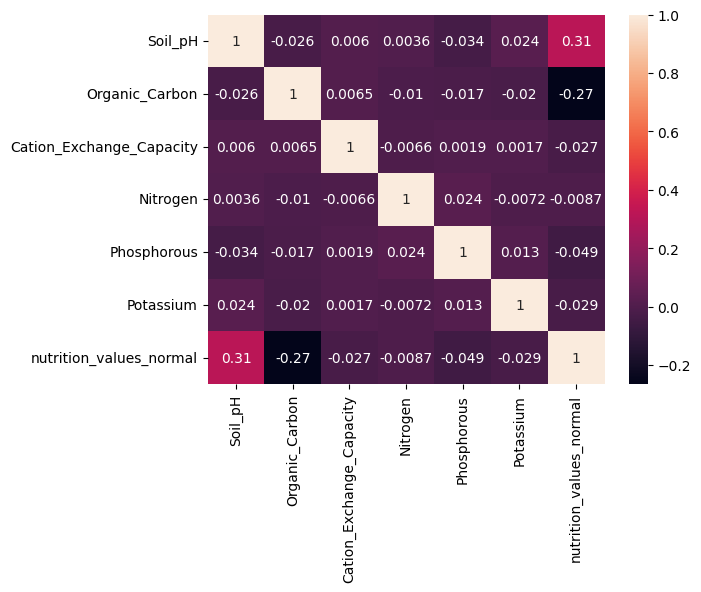

In [41]:
hm=sns.heatmap(df.corr(),annot=True)
plt.savefig('heatmap.jpg')
plt.show()

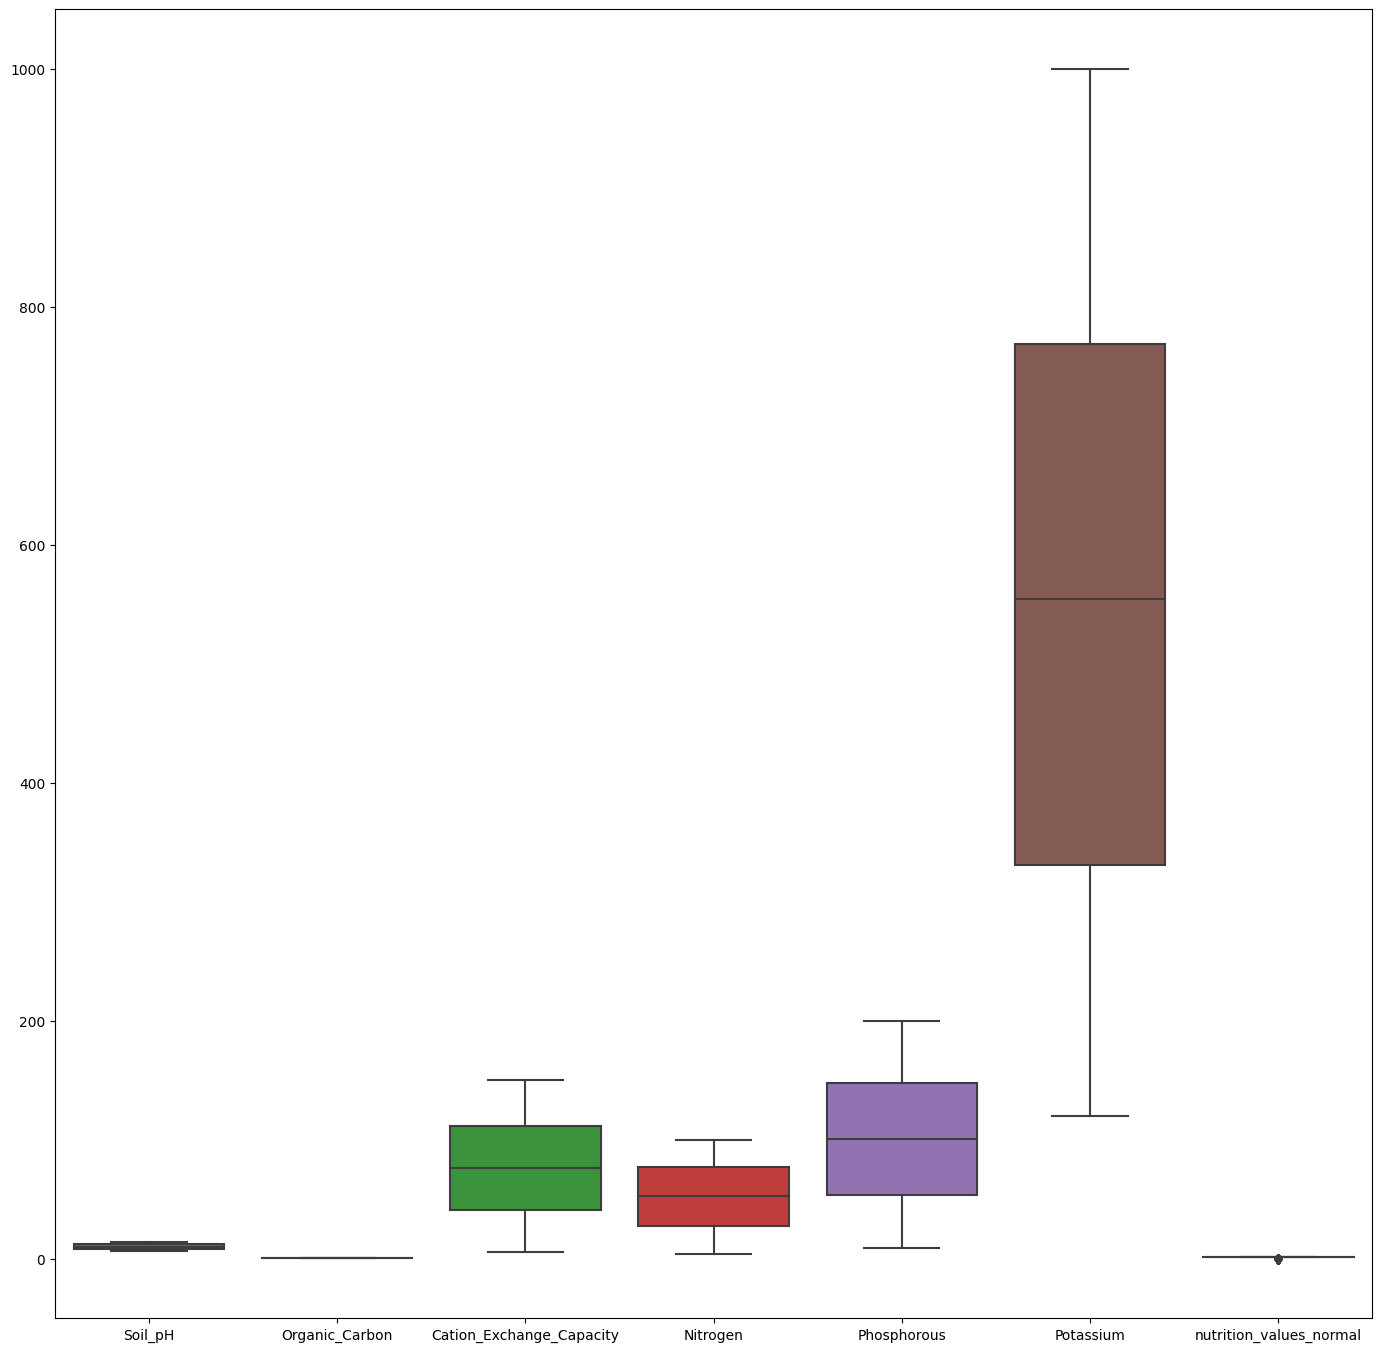

In [42]:
plt.subplots(figsize=(17,17))
sns.boxplot(data=df)
plt.savefig('boxplot.jpg')
plt.show()

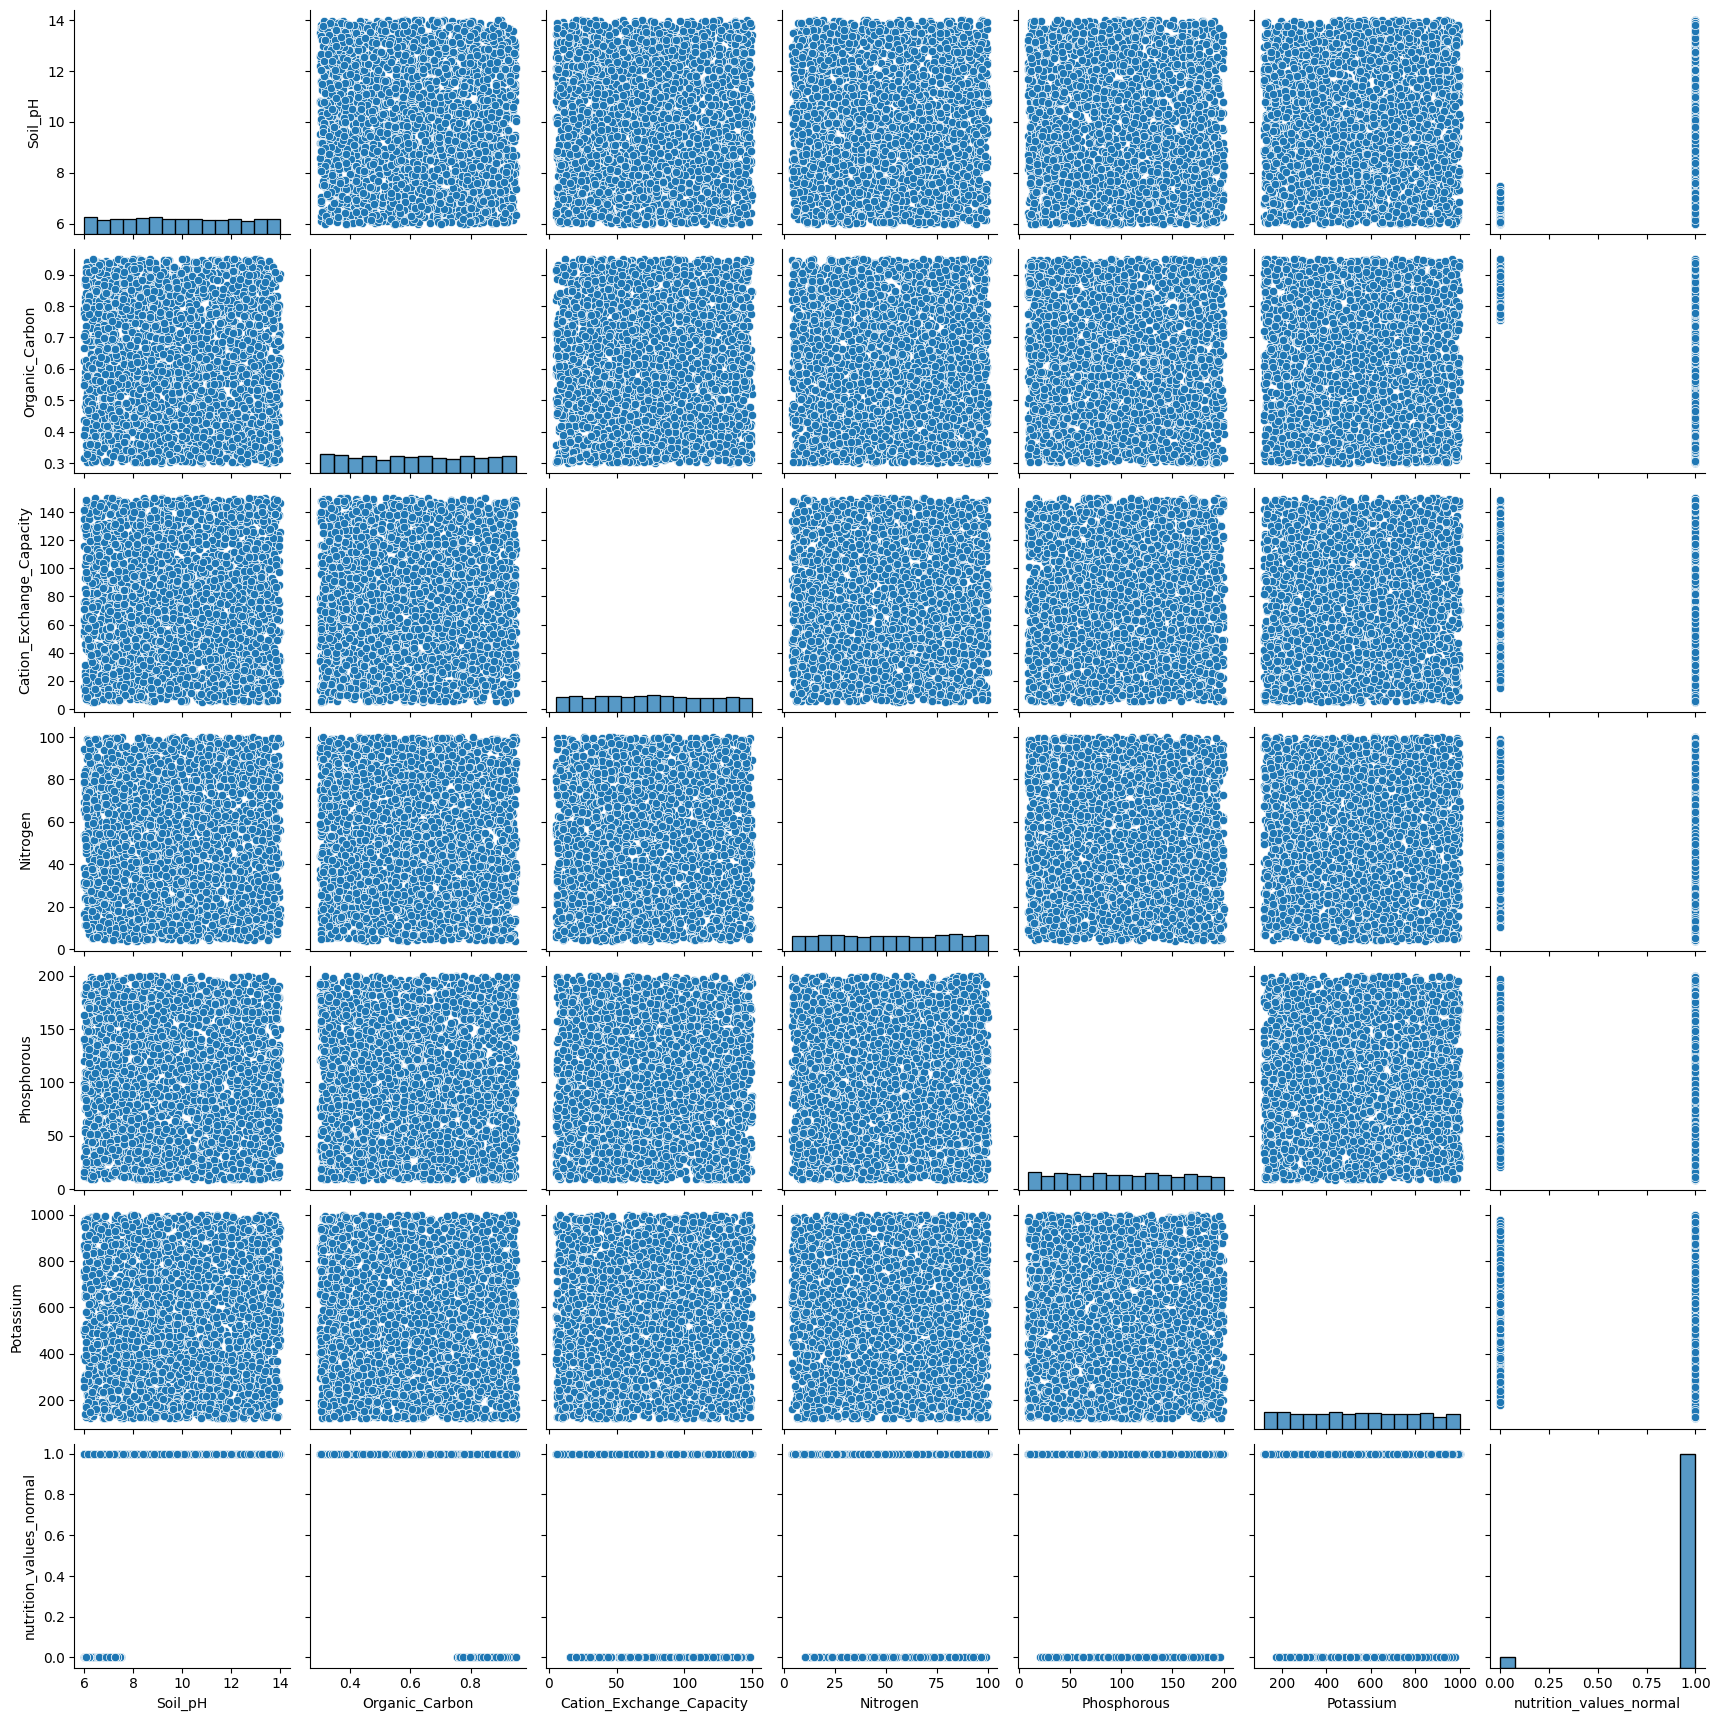

In [43]:
sns.pairplot(data=df)
plt.savefig('pairplot.jpg')
plt.show()

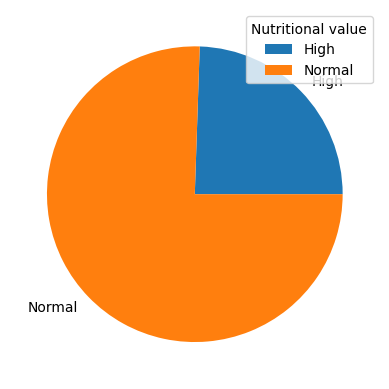

In [44]:
n=['High','Normal']
size=[734,2266]
plt.pie(size,labels=n)
plt.legend(title='Nutritional value')
plt.savefig('piechart.jpg')
plt.show()

In [45]:
X=df.drop('nutrition_values_normal',axis=1)
y=df['nutrition_values_normal']

In [46]:
, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
lg = LogisticRegression()
scores = cross_val_score(lg, X_train, y_train, cv=5)
mean_score= scores.mean()
std_dev = scores.std()
if mean_score > std_dev:
    print("The LG model trained on the training set is not overfitting.")
else:
    print("The LG model trained on the training set may be overfitting.")
lg.fit(X_train, y_train)
p = lg.predict(X_test)
accuracy_score(y_test,p)



The LG model trained on the training set is not overfitting.


0.9895104895104895

In [47]:
precision_score(y_test,p)

0.9758620689655172

In [48]:
recall_score(y_test,p)


0.9895104895104895

In [49]:
ipt_data=[[6.978611,	0.774360,	70.834044,	59.877609,	53.823617,	781.161]]
p1=lg.predict(ipt_data)
if p1==1 :
  print('The Nutritional value is Normal')
else:
  print('The Nutritional value is High')

The Nutritional value is High


In [50]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

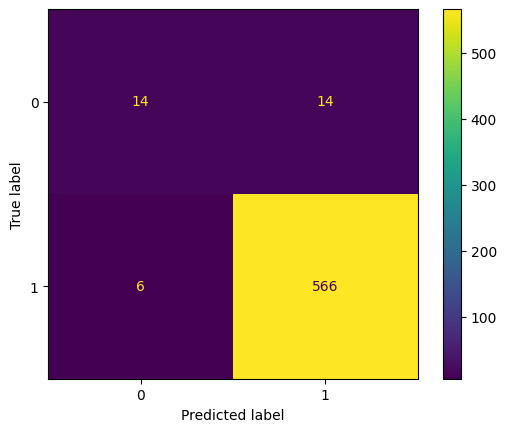

In [51]:
cm = confusion_matrix(y_test, p, labels=lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot()
plt.savefig('cm.jpg')
plt.show()

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
#model=svm.SVC()
model.fit(X_train,y_train)
print(model)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)
print(pred)
print(y_test)
print(acc)

SVC(kernel='linear', random_state=0)
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [52]:
precision_score(y_test,pred)

0.9825479930191972

In [53]:
recall_score(y_test,pred)

0.9842657342657343

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier(n_estimators=4,random_state=0)
xg.fit(X_train,y_train)
xg_p=xg.predict(X_test)
confusion_matrix(y_test,xg_p)

array([[ 28,   0],
       [  1, 571]])

In [ ]:
accuracy_score(y_test,xg_p)

0.9983333333333333

In [55]:
precision_score(y_test,xg_p)

1.0

In [56]:
recall_score(y_test,xg_p)

0.9982517482517482

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
a=AdaBoostClassifier(n_estimators=4,random_state=0,algorithm='SAMME')
a.fit(X_train,y_train)
a_p=a.predict(X_test)
accuracy_score(y_test,a_p)

0.9533333333333334

In [85]:
precision_score(y_test,a_p)

0.9533333333333334

In [58]:
recall_score(y_test,a_p)

1.0

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
g=GradientBoostingClassifier()
g.fit(X_train,y_train)
g_p=g.predict(X_test)
accuracy_score(y_test,g_p)

0.9983333333333333

In [59]:
precision_score(y_test,g_p)

1.0

In [60]:
recall_score(y_test,g_p)

0.9982517482517482

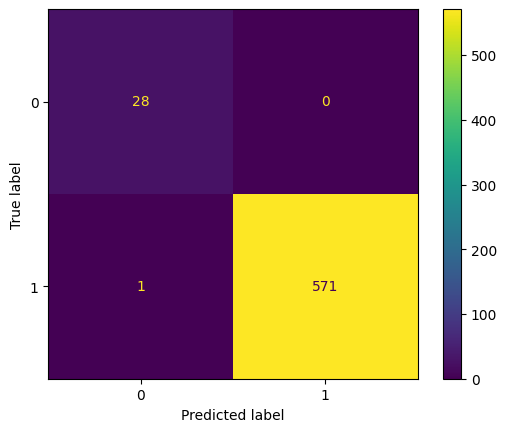

In [61]:
predict=g.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=g.classes_)
disp.plot()
plt.savefig('cm.jpg')
plt.show()

In [62]:
cm=confusion_matrix(y_test,predict)
cm

array([[ 28,   0],
       [  1, 571]])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
ac_l=[]
k_value=range(1,30)
for k in k_value:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  knn_p=knn.predict(X_test)
  ac=accuracy_score(y_test,knn_p)
  ac_l.append(ac)

In [67]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_p=knn.predict(X_test)
accuracy_score(y_test,knn_p)

0.975

In [68]:
precision_score(y_test,knn_p)

0.9843478260869565

In [69]:
recall_score(y_test,knn_p)

0.9895104895104895

In [87]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
p=d.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,p)

array([[ 28,   0],
       [  1, 571]])

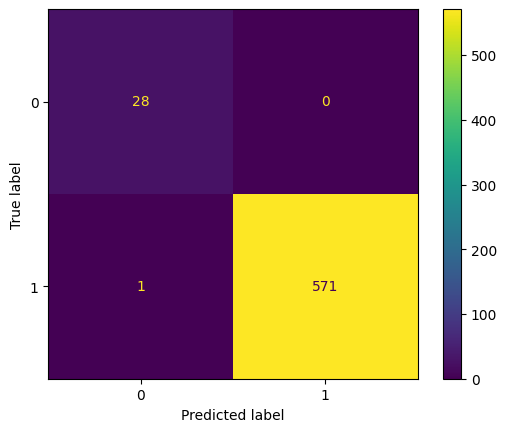

In [88]:
cm = confusion_matrix(y_test, p, labels=d.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=d.classes_)
disp.plot()
plt.savefig('cmdec.jpg')
plt.show()

In [74]:
classification_report(y_test,p)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98        28\n           1       1.00      1.00      1.00       572\n\n    accuracy                           1.00       600\n   macro avg       0.98      1.00      0.99       600\nweighted avg       1.00      1.00      1.00       600\n'

In [75]:
accuracy_score(y_test,p)

0.9983333333333333

In [76]:
precision_score(y_test,p)

1.0

In [77]:
recall_score(y_test,p)

0.9982517482517482

In [78]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=3,criterion='entropy',random_state=0)
r.fit(X_train,y_train)
p=r.predict(X_test)
confusion_matrix(y_test,p)

array([[ 27,   1],
       [  1, 571]])

In [79]:
classification_report(y_test,p)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96        28\n           1       1.00      1.00      1.00       572\n\n    accuracy                           1.00       600\n   macro avg       0.98      0.98      0.98       600\nweighted avg       1.00      1.00      1.00       600\n'

In [80]:
accuracy_score(y_test,p)

0.9966666666666667

In [81]:
precision_score(y_test,p)

0.9982517482517482

In [82]:
recall_score(y_test,p)

0.9982517482517482

<ipython-input-83-4bcf67100882>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(range(len(accuracy_scores)))


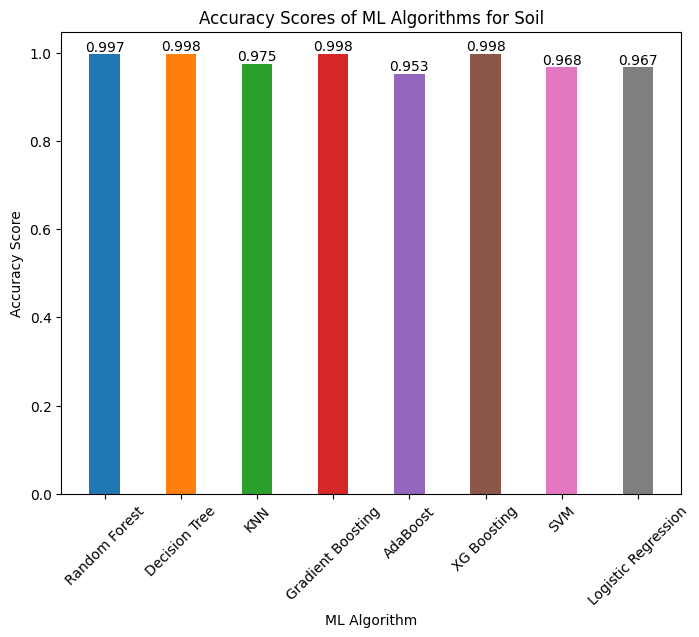

In [83]:
accuracy_scores =[0.9967,0.998,0.975,0.998,0.953,0.998,0.968,0.967]
ml=['Random Forest','Decision Tree','KNN','Gradient Boosting','AdaBoost','XG Boosting','SVM','Logistic Regression']
fig, ax = plt.subplots(figsize=(8, 6))

# Set the bar width
bar_width = 0.4

# Generate a color map for the bars
colors = plt.cm.get_cmap('tab10')(range(len(accuracy_scores)))

# Plot the bars
bars = ax.bar(ml, accuracy_scores, width=bar_width, color=colors)

# Add the accuracy scores on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3),
            ha='center', va='bottom')

# Set the y-axis label
ax.set_ylabel('Accuracy Score')

# Set the x-axis label
ax.set_xlabel('ML Algorithm')
ax.set_title('Accuracy Scores of ML Algorithms for Soil')
plt.xticks(rotation=45)
plt.savefig('barplot.jpg')
plt.show()


<ipython-input-84-6ee5332d2a7f>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(ml))


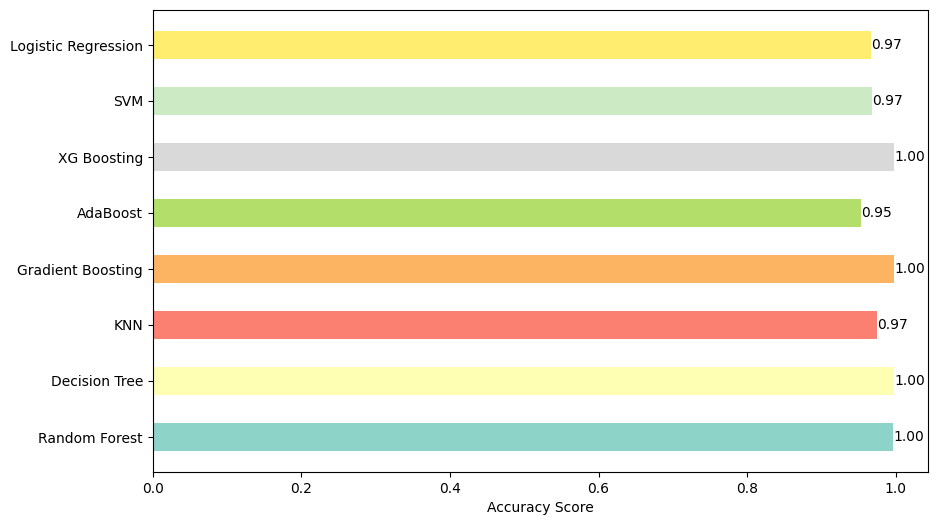

In [84]:
accuracy_scores =[0.9967,0.998,0.975,0.998,0.953,0.998,0.968,0.967]
ml=['Random Forest','Decision Tree','KNN','Gradient Boosting','AdaBoost','XG Boosting','SVM','Logistic Regression']
figure_size = (10, 6)  # Adjust the size of the figure
bar_height = 0.5  # Adjust the height of the bars

# Generate colors for each bar
colors = plt.cm.get_cmap('Set3', len(ml))

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=figure_size)
bars = ax.barh(range(len(ml)), accuracy_scores, height=bar_height, color=colors(range(len(ml))))

# Add labels and accuracy scores on top of each bar
for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{accuracy_scores[i]:.2f}', va='center')

# Set y-axis labels
ax.set_yticks(range(len(ml)))
ax.set_yticklabels(ml)

# Set x-axis label and range
ax.set_xlabel('Accuracy Score')
# Calculate the maximum difference between successive accuracy scores
max_diff = max(np.diff(accuracy_scores))

# Set x-axis limit with the difference added
ax.set_xlim([0, max(accuracy_scores) + max_diff])


# Show the plot
plt.show()
